In [1]:
import sys
import gpflow
assert (gpflow.__version__ == "0.5")
import tensorflow
assert (tensorflow.__version__ == "1.9.0")
import torch
assert (torch.__version__ =="0.3.1")



/Users/frag/anaconda3/envs/test_BNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/frag/anaconda3/envs/test_BNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/frag/anaconda3/envs/test_BNN/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/frag/anaconda3/envs/test_BNN/lib/pyt

In [2]:
%ls

__pycache__/                   process_comparison_ML.py
comparison_ML.py               process_comparison_bias.py
comparison_bias.py             process_comparison_bias_2d.py
comparison_bias_2d.py          process_comparison_four.py
comparison_bias_four.py        process_comparison_yacht.py
comparison_smooth_xor.py       process_mmds.py
comparison_snelson.py          process_mmds_all.py
comparison_yacht.py            process_smooth_xor.py
datasets/                      process_snelson.py
defaults.py                    results/
mmd_experiment.py              shared.py
our_exp.ipynb


In [3]:
from shared import get_nn_model,draw_sample_from_nn_prior,ResultsManager, nn_model_regression

import matplotlib.pyplot as plt 
import defaults
import torch
import numpy as np

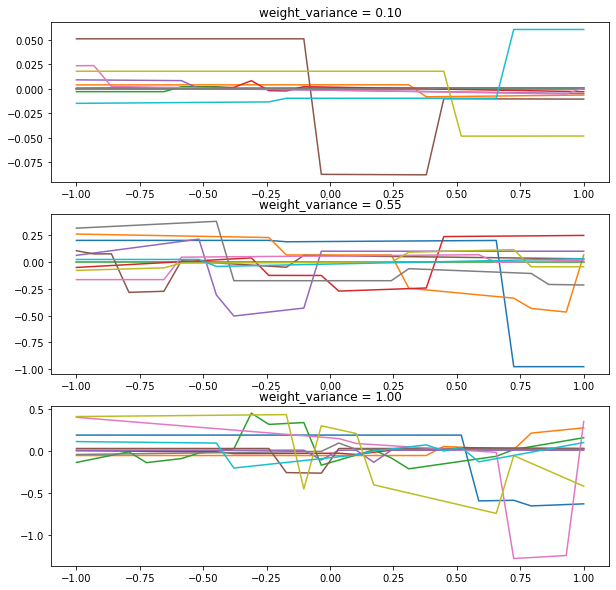

In [185]:

D_IN = 1
H = 3
D_OUT = 1
num_layers = 3
weight_variance = 0.8
bias_variance = 0.2
width_class = 'identity'
list_weight_variance = np.linspace(0.1,1,3)
fig, axs = plt.subplots(len(list_weight_variance),1,figsize = (10,10))
rep = 10
for k,weight_variance in enumerate(list_weight_variance):
    axs[k].set_title('weight_variance = %.2f'%(weight_variance))
    for i in range(rep):
        model = get_nn_model(D_IN,H,D_OUT, num_layers, width_class=width_class, weight_variance=weight_variance, bias_variance=bias_variance,activation = torch.nn.Threshold(0, 1))

        grid = np.atleast_2d(
        np.linspace(-1,1,30).astype(np.float32)
        ).T
        grid_var = torch.autograd.Variable(
            torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
        )

        output = model(grid_var)
        output = model(grid_var)
        output =output.data.numpy()
        output = (output - output.mean())
        axs[k].plot(grid, output)
        

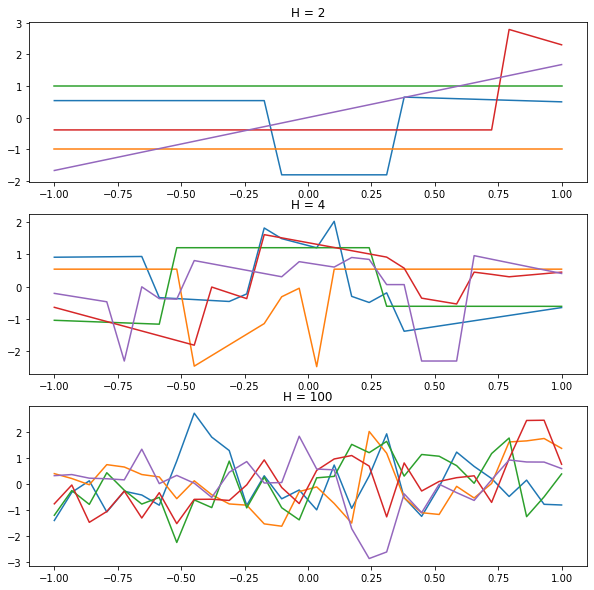

In [186]:

D_IN = 1
H = 5
D_OUT = 1
num_layers = 3
weight_variance = 0.8
bias_variance = 0.2

# list_H = np.logspace(np.log(2)/np.log(10),np.log(30)/np.log(10),3).astype(int).tolist()
# print(list_H)
list_H  = [2,4,100]
fig, axs = plt.subplots(len(list_H),1,figsize = (10,10))
rep = 5
for k,H in enumerate(list_H):
    axs[k].set_title('H = %s'%(H))
    for i in range(rep):
        model = get_nn_model(D_IN,H,D_OUT, num_layers, width_class='identity', weight_variance=weight_variance, bias_variance=bias_variance,activation = torch.nn.Threshold(0, 1))

        grid = np.atleast_2d(
        np.linspace(-1,1,30).astype(np.float32)
        ).T
        grid_var = torch.autograd.Variable(
            torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
        )

        output = model(grid_var)
        output =output.data.numpy()[:,0]

        output = (output - output.mean())/output.std()
        
#         output = np.concatenate((output[1:] - output[:-1],[0]))
        
        axs[k].plot(grid, output)


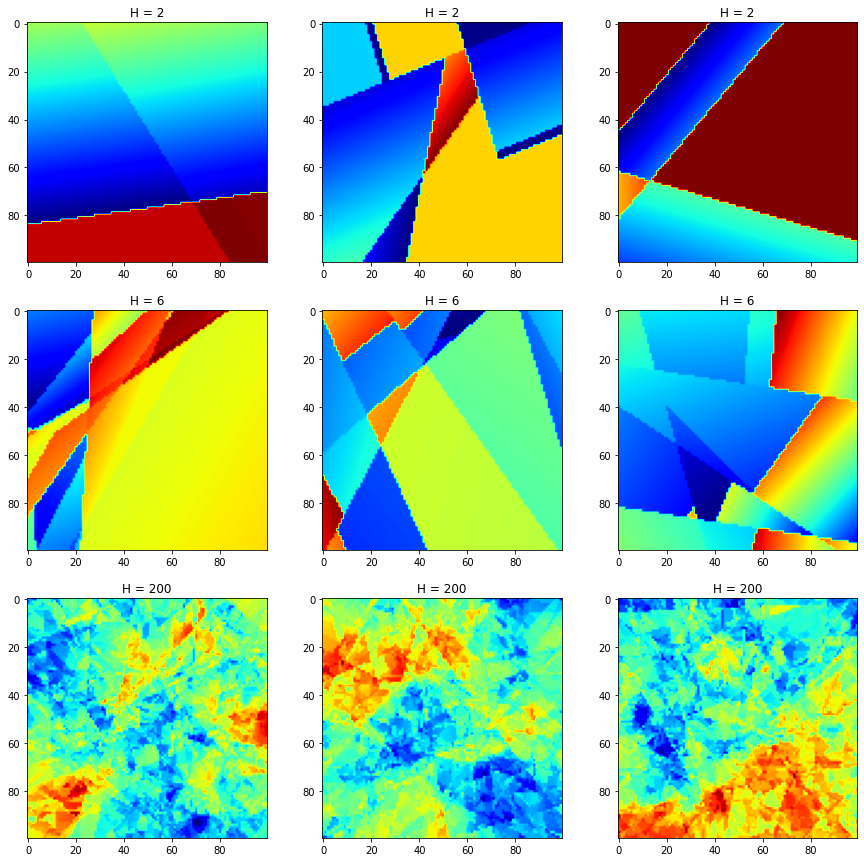

In [194]:

D_IN = 2
H = 3
D_OUT = 1
num_layers = 2
weight_variance = 0.8
bias_variance = 0.5


l_grid = 100
grid_x = np.linspace(-1,1,l_grid)
grid_y = np.linspace(-1,1,l_grid)

grid_x, grid_y = np.meshgrid(grid_x, grid_y)
grid_x = grid_x.flatten()
grid_y = grid_y.flatten()
grid = np.vstack((grid_x,grid_y)).T
grid_var = torch.autograd.Variable(
        torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
    )

# list_H = list(range(1,50,15))
list_H = [2,6,200]
rep = 3
fig, axs = plt.subplots(len(list_H),rep,figsize = (15,15))
for k,H in enumerate(list_H):
    for i in range(rep):
        model = get_nn_model(D_IN,H,D_OUT, num_layers, width_class='identity', weight_variance=weight_variance, bias_variance=bias_variance,    activation = torch.nn.Threshold(0, 1)
 )

        output = model(grid_var)
        output = model(grid_var)
        output =output.data.numpy()
#         output = (output - output.mean())/output.std()
        
        axs[k,i].imshow(output.reshape(l_grid,l_grid),cmap='jet')
        axs[k,i].set_title('H = %s'%(H))


# Experiments in 1D

0.9785289
<class 'torch.autograd.variable.Variable'> <class 'torch.autograd.variable.Variable'> <class 'torch.autograd.variable.Variable'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>
torch.Size([100, 1]) torch.Size([34, 1]) torch.Size([34, 1]) torch.Size([100, 1])


(None,)

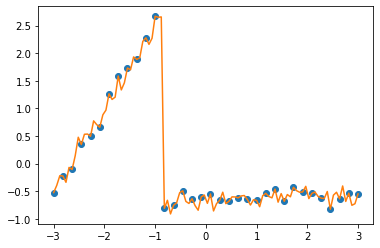

In [400]:
from shared import ResultsManager, nn_model_regression

D_IN = 1
H = 2
D_OUT = 1
num_layers = 2
weight_variance_0 = 0.8
bias_variance_0 = 0.2
width_class = "largest_last"
min_range, max_range = -2, 2

noise_std = 0.1

gen_model = get_nn_model(
    D_IN,
    H,
    D_OUT,
    num_layers,
    width_class=width_class,
    weight_variance=weight_variance_0,
    bias_variance=bias_variance_0 ,
    activation = torch.nn.Threshold(0, 1)
    
)

n_data = 30

grid = np.atleast_2d(
    np.linspace(1.5 * min_range, 1.5 * max_range, 100).astype(np.float32)
).T
grid_var = torch.autograd.Variable(
    torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
)
true_val = gen_model(grid_var)
true_val = true_val.detach()
true_val_var = true_val
std, mean = true_val.std(), true_val.mean()
true_val = (true_val - mean) / std

true_val = true_val + torch.autograd.Variable(
    torch.normal(
        0.0 * torch.ones(true_val.size()), noise_std * torch.ones(true_val.size())
    ).type(defaults.tdtype),
    requires_grad=False,
)



X = grid[torch.from_numpy(np.arange(0, 100, 100 // n_data).astype(int))]
X_var = torch.autograd.Variable(
    torch.from_numpy(X).type(defaults.tdtype), requires_grad=False
)
Y_var = true_val[
    torch.from_numpy(np.arange(0, 100, 100 // n_data).astype(int))
]
Y_var = Y_var.detach()


true_val = true_val.data.numpy()
Y = Y_var.data.numpy().reshape(-1, 1)


plt.plot(X, Y, "o")
plt.plot(grid, true_val)
eps = np.std(Y)
print(eps)

print(type(grid_var), type(X_var), type(Y_var), type(true_val)),
print(type(grid), type(X), type(Y), type(true_val)),
print(grid_var.shape, X_var.shape, Y_var.shape, true_val_var.shape),


# Sinus Data

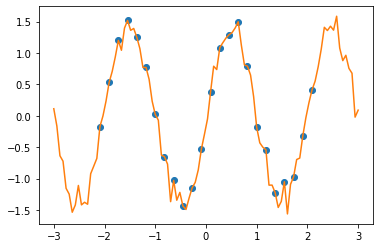

In [31]:
# n_data = 30

# T = 2

# grid = np.atleast_2d(
#     np.linspace(1.5 * min_range, 1.5 * max_range, 100).astype(np.float32)
# ).T
# grid_var = torch.autograd.Variable(
#     torch.from_numpy(grid).type(defaults.tdtype), requires_grad=False
# )

# true_val_var = np.sin(2 * np.pi * grid / T) + np.random.normal(
#     scale=noise_std, size=grid.shape
# )

# true_val_var = torch.autograd.Variable(
#     torch.from_numpy(true_val_var).type(defaults.tdtype), requires_grad=False
# )

# std, mean = true_val_var.std(), true_val_var.mean()
# true_val_var = (true_val_var - mean) / std
# true_val = true_val_var.data.numpy()
# X = grid[
#     torch.from_numpy(np.arange(0 + 15, 100 - 15, 100 // n_data).astype(int))
# ]
# X_var = torch.autograd.Variable(
#     torch.from_numpy(X).type(defaults.tdtype), requires_grad=False
# )
# Y_var = true_val_var[
#     torch.from_numpy(np.arange(0 + 15, 100 - 15, 100 // n_data).astype(int))
# ]
# Y_var = Y_var.detach()

# Y = Y_var.data.numpy()


# plt.plot(X, Y, "o")
# plt.plot(grid, true_val_var.data.numpy())
# eps = np.std(Y)



3.2361842358707134 2.7016603415503795 0.16093472254107424


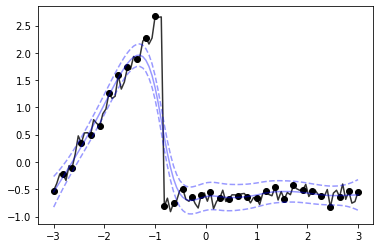

In [401]:
from RecursiveKernel import DeepArcCosine
from experiments.shared import get_gp_model

weight_variance_0 = 0.8
bias_variance_0 = 0.2

def getRunGPModel(X,Y):
    kernel = DeepArcCosine(input_dim=1, num_steps=num_layers, variance = weight_variance_0, bias_variance = bias_variance_0)
    model = gpflow.gpr.GPR( X=X, Y=Y, kern=kernel)
    gp_model = get_gp_model(X,Y,input_dim=X.shape[1],depth=num_layers)

    gp_model.optimize()
    return gp_model

gpModel = getRunGPModel(X,Y)
gp_mean, gp_var = gpModel.predict_f(grid) 

bias_variance = gpModel.kern.bias_variance.value[0]
weight_variance = gpModel.kern.variance.value[0]
noise_variance = gpModel.likelihood.variance.value[0]
print(bias_variance,weight_variance,noise_variance)


plt.plot(X, Y,'o',label = 'train _data', color = 'black')
plt.plot(grid, true_val,alpha=0.8, color = 'black')

plt.plot(grid, gp_mean,color='blue', alpha = 0.4, label = 'GP_pred')
plt.plot(grid, gp_mean - np.sqrt(gp_var),'--',color='blue', alpha = 0.4)
plt.plot(grid, gp_mean + np.sqrt(gp_var),'--',color='blue', alpha = 0.4)


In [297]:
# X = np.atleast_2d( np.array([-1.,-.5, 0.,.5, 1.], np.float32 ) ).T
# Y = np.array( [ [-1.,-.5, 0., .5, 1.] ], np.float32 ).T
# grid = np.atleast_2d( np.linspace( -2. , 2., 100 ) ).T    

# print(X.shape, Y.shape)

In [298]:
# mask = torch.arange(0,10,2)
# X_train, Y_train = X[mask], Y[mask]
# mask = torch.arange(1,10,2)
# X_test, Y_test = X[mask], Y[mask]
# plt.plot(X_train.detach().numpy(), Y_train.detach().numpy(),'o')
# plt.plot(X_test.detach().numpy(), Y_test.detach().numpy(),'o')
# plt.show()

In [402]:

model = get_nn_model(
    D_IN,
    H,
    D_OUT,
    num_layers,
    width_class=width_class,
    weight_variance=weight_variance,
    bias_variance=bias_variance,
)

nthin = 10
burn_in = 1000
results_manager_same_H = ResultsManager(
    true_val, burn_in, nthin, True, True, True, True, True
)

this_model_var = noise_variance
# this_model_var = noise_std**2

nn_model_regression(
    X_var,
    Y_var,
    grid_var,
    model,
     num_samples=20000,
    noise_variance=this_model_var,
     epsilon = 0.0005,
    beta = 0.1,
    leap_frog_iters = 10,
    results_manager=results_manager_same_H,
)


  0%|          | 6/20000 [00:00<05:57, 55.87it/s]

initializing
initializing
initializing
initializing
initializing
initializing


100%|██████████| 20000/20000 [04:57<00:00, 67.30it/s]

Total time 297.18972277641296
iterations per second 67.29707815315926


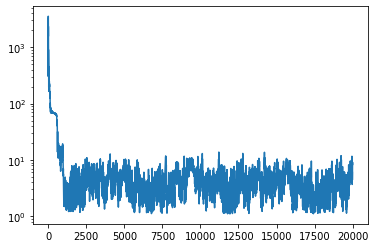

In [403]:
E_same_H = results_manager_same_H.energies
mu_same_H = results_manager_same_H.online_mean
var_same_H = results_manager_same_H.var
plt.plot(E_same_H,label = 'E high H')
plt.yscale('log')

In [405]:
large_H = 50
model = get_nn_model(
    D_IN,
    large_H,
    D_OUT,
    num_layers,
    width_class=width_class,
    weight_variance=weight_variance,
    bias_variance=bias_variance,
)

nthin = 1
burn_in = 300
results_manager = ResultsManager(
    true_val, burn_in, nthin, True, True, True, True, True
)
this_model_var = noise_variance
# this_model_var = noise_std**2

nn_model_regression(
    X_var,
    Y_var,
    grid_var,
    model,
    num_samples=10000,
    noise_variance=this_model_var,
     epsilon = 0.0005,
    beta = 0.1,
    leap_frog_iters = 10,
    results_manager=results_manager,
)


  0%|          | 3/10000 [00:00<05:49, 28.64it/s]

initializing
initializing
initializing
initializing
initializing
initializing


100%|██████████| 10000/10000 [03:23<00:00, 49.04it/s]

Total time 203.92639088630676
iterations per second 49.037301923198406


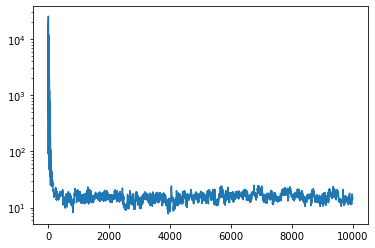

In [406]:

E = results_manager.energies
mu = results_manager.online_mean
var = results_manager.var
plt.plot(E,label = 'E same H')
plt.yscale('log')

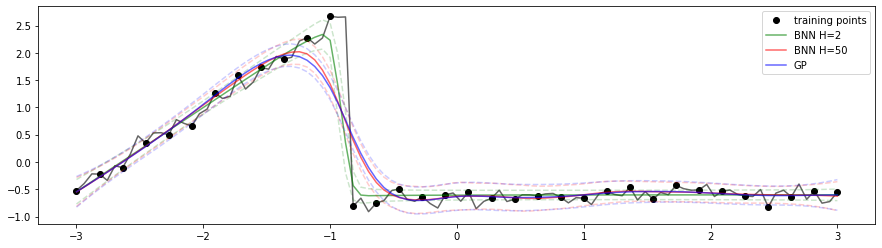

In [420]:
plt.figure(figsize=(15,4))

plt.plot(X, Y,'o',label = 'training points', color = 'black')
plt.plot(grid, true_val,alpha=0.6, color = 'black')


plt.plot(grid, mu_same_H ,color='green', alpha = 0.6, label = f'BNN H={H}')
plt.plot(grid, mu_same_H - np.sqrt(var_same_H),'--',color='green', alpha = 0.2)
plt.plot(grid, mu_same_H + np.sqrt(var_same_H),'--',color='green', alpha = 0.2)


plt.plot(grid, mu ,color='red', alpha = 0.6, label = f'BNN H={large_H}')
plt.plot(grid, mu - np.sqrt(var),'--',color='red', alpha = 0.2)
plt.plot(grid, mu + np.sqrt(var),'--',color='red', alpha = 0.2)


plt.plot(grid, gp_mean,color='blue', alpha = 0.6, label = 'GP')
plt.plot(grid, gp_mean - np.sqrt(gp_var),'--',color='blue', alpha = 0.2)
plt.plot(grid, gp_mean + np.sqrt(gp_var),'--',color='blue', alpha = 0.2)


plt.legend()


cumulated_error same H : 0.19708845969139155
cumulated_error large H : 0.29574553189668606
cumulated_error GP : 0.3136405524891317


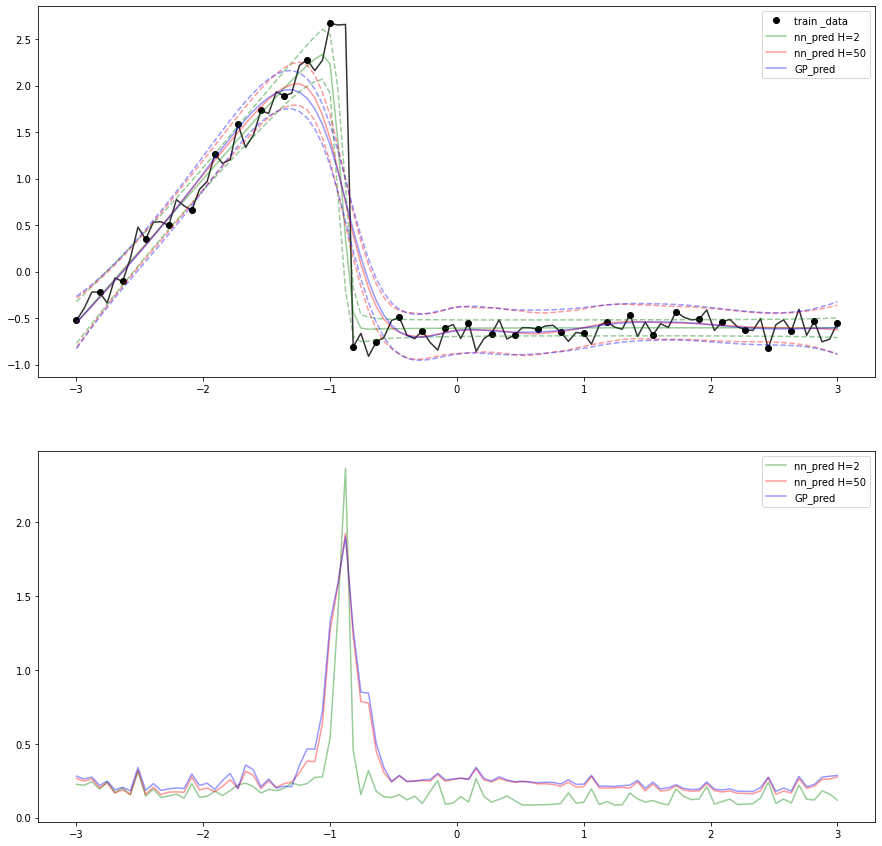

In [421]:

error_same_H = (mu_same_H - true_val.reshape(-1))**2 + var_same_H 
error_large_H = (mu - true_val.reshape(-1))**2 + var 
error_GP = ((gp_mean.reshape(-1) - true_val.reshape(-1))**2) + gp_var.reshape(-1)


plt.figure(figsize=(15,15))
plt.subplot(211)
plt.plot(X, Y,'o',label = 'train _data', color = 'black')
plt.plot(grid, true_val,alpha=0.8, color = 'black')


plt.plot(grid, mu_same_H ,color='green', alpha = 0.4, label = f'nn_pred H={H}')
plt.plot(grid, mu_same_H - np.sqrt(var_same_H),'--',color='green', alpha = 0.4)
plt.plot(grid, mu_same_H + np.sqrt(var_same_H),'--',color='green', alpha = 0.4)


plt.plot(grid, mu ,color='red', alpha = 0.4, label = f'nn_pred H={large_H}')
plt.plot(grid, mu - np.sqrt(var),'--',color='red', alpha = 0.4)
plt.plot(grid, mu + np.sqrt(var),'--',color='red', alpha = 0.4)


plt.plot(grid, gp_mean,color='blue', alpha = 0.4, label = 'GP_pred')
plt.plot(grid, gp_mean - np.sqrt(gp_var),'--',color='blue', alpha = 0.4)
plt.plot(grid, gp_mean + np.sqrt(gp_var),'--',color='blue', alpha = 0.4)


plt.legend()

plt.subplot(212)
plt.plot(grid.reshape(-1), np.sqrt(error_same_H) ,color='green', alpha = 0.4, label = f'nn_pred H={H}')

plt.plot(grid.reshape(-1), np.sqrt(error_large_H) ,color='red', alpha = 0.4, label = f'nn_pred H={large_H}')

plt.plot(grid.reshape(-1), np.sqrt(error_GP),color='blue', alpha = 0.4, label = 'GP_pred')

plt.legend()

print('cumulated_error same H :', np.sqrt(error_same_H).mean())
print('cumulated_error large H :', np.sqrt(error_large_H).mean())
print('cumulated_error GP :' , np.sqrt(error_GP).mean())